# Evalution Result
| YOLO-Empty | train | validation | test |
| ------- | ------- | ------- | ------- |
| mAP50  | 0.94 | 0.994  | 0.993  |
| mAP50-95   | 0.886  | 0.789  | 0.791  |
| Precision   | 0.997  | 0.989  | 0.989  |
| Recall  | 0.995  | 0.993  | 0.996  |

# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/42028_Assessment3

/content/drive/MyDrive/42028_Assessment3


In [ ]:
ls

 dataset/                                pre_seat.ipynb
 dataset_empty/                          ssd_coco_dataset/
 dataset_empty_pascal/                   unzip.ipynb
 experiment/                             Video_Inference/
 obj_train_data/                         yolo_angle_3_1_standing.zip
 original/                              'yolo_empty(Data enhancement).ipynb'
 pre_dataset/                            yolo_empty.ipynb
 pre_dataset_angle3standing/            'yolo_formal(Data_enhancement).ipynb'
'pre_dataset_angle3standing\test.txt'    yolo_formal.ipynb
'pre_dataset_angle3standing\train.txt'   YOLO_STANDING/
'pre_dataset_angle3standing\val.txt'     yolov5/


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git # Import the existing yolov5 model

Cloning into 'yolov5'...
remote: Enumerating objects: 15639, done.
remote: Counting objects: 100% (246/246), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 15639 (delta 121), reused 142 (delta 69), pack-reused 15393
Receiving objects: 100% (15639/15639), 14.65 MiB | 10.09 MiB/s, done.
Resolving deltas: 100% (10649/10649), done.


In [ ]:
ls

 dataset/                               'pre_dataset_angle3standing\val.txt'
 dataset_empty/                          pre_seat.ipynb
 dataset_empty_pascal/                   unzip.ipynb
 experiment/                             Video_Inference/
 obj_train_data/                         yolo_angle_3_1_standing.zip
 original/                               yolo_empty.ipynb
 pre_dataset/                            yolo_formal.ipynb
 pre_dataset_angle3standing/             YOLO_STANDING/
'pre_dataset_angle3standing\test.txt'    yolov5/
'pre_dataset_angle3standing\train.txt'


In [ ]:
%cd /content/drive/MyDrive/42028_Assessment3/yolov5

/content/drive/MyDrive/42028_Assessment3/yolov5


In [ ]:
ls

 1_data_yaml             DetectionResult2.webm   README.zh-CN.md
 a_data_yaml             DetectionResult.webm    requirements.txt
 adata_yaml              detect.py               runs/
 benchmarks.py           empty1.pt               segment/
 CITATION.cff            empty.pt                setup.cfg
 classify/               export.py               train.py
 CONTRIBUTING.md         hubconf.py              tutorial.ipynb
 data/                   LICENSE                 utils/
 data_seat.yaml          models/                 val.py
 data_standing.yaml      new_data_yaml          'yolov5m (1).pt'
 data.yaml               new_train_yaml          yolov5m.pt
 data_yaml               __pycache__/            yolov5s.pt
 DetectionResult1.webm   README.md               yolov5s-seg.pt


In [ ]:
!pip install -r requirements.txt # Import package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


## Setup Dataset Configuration (data.yaml)

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 1
train_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/train" #@param {type:"string"}
val_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/valid" #@param {type:"string"}
test_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/test" #@param {type:"string"}

class_names = ["Empty_Seat"] #@param {type:"raw"}
with open('adata_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

In [ ]:
#@title Setup Training YAML File
# Choose yolov5m as transfer learning
number_of_classes = 1 #@param {type:"integer"}
with open('new_train_yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.67  # model depth multiple
        width_multiple: 0.75  # layer channel multiple
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 v6.0 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
          [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
          [-1, 3, C3, [128]],
          [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
          [-1, 6, C3, [256]],
          [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
          [-1, 9, C3, [512]],
          [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
          [-1, 3, C3, [1024]],
          [-1, 1, SPPF, [1024, 5]],  # 9
          ]

        # YOLOv5 v6.0 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
          [-1, 1, nn.Upsample, [None, 2, 'nearest']],
          [[-1, 6], 1, Concat, [1]],  # cat backbone P4
          [-1, 3, C3, [512, False]],  # 13

          [-1, 1, Conv, [256, 1, 1]],
          [-1, 1, nn.Upsample, [None, 2, 'nearest']],
          [[-1, 4], 1, Concat, [1]],  # cat backbone P3
          [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

          [-1, 1, Conv, [256, 3, 2]],
          [[-1, 14], 1, Concat, [1]],  # cat head P4
          [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

          [-1, 1, Conv, [512, 3, 2]],
          [[-1, 10], 1, Concat, [1]],  # cat head P5
          [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

          [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

# Training with YOLOv5

In [ ]:
from datetime import datetime # To get model training time
import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library for drawing graphs

start = datetime.now() # Get the current time of start
!python train.py --img 416 --batch 32 --epochs 50 --hyp "/content/drive/MyDrive/42028_Assessment3/yolov5/data/hyp.scratch.yaml" --data adata_yaml --weights yolov5m.pt --cfg new_train_yaml  # The input img size was set to 416, batch size was set to 32, epochs was set to 10 rounds, and the weight algorithm was selected as YOLOv5m
end = datetime.now() # Get the current time of end
print('Trainine time:', end - start)

train: weights=yolov5m.pt, cfg=new_train_yaml, data=adata_yaml, hyp=/content/drive/MyDrive/42028_Assessment3/yolov5/data/hyp.scratch.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 12 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
requirements: /content/drive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: copy_paste=0.5, lr0=0.01, lrf=0

Show the result of train and validation

Text(0.5, 1.0, 'Validation')

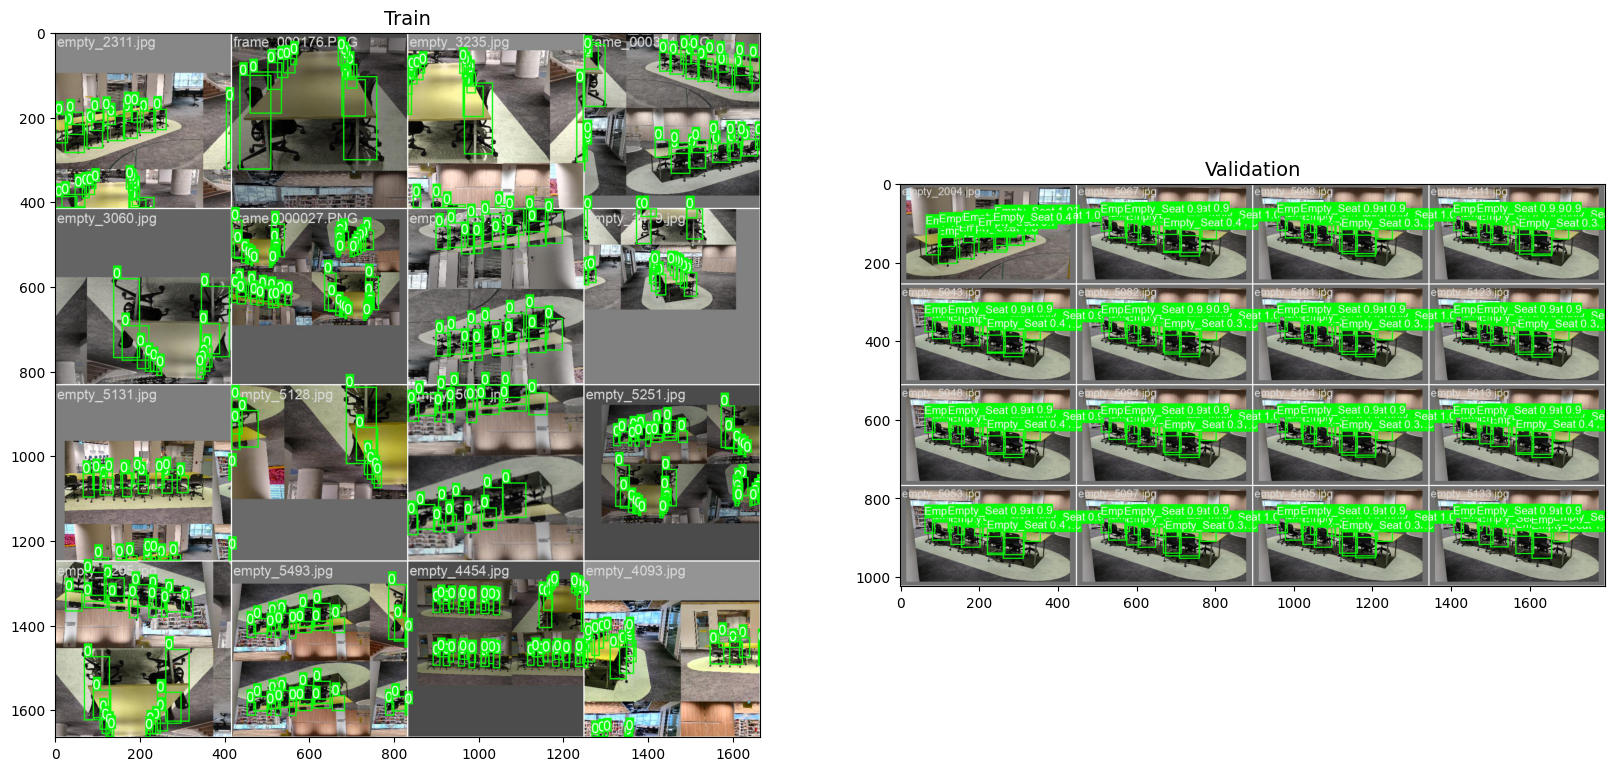

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(20, 16))
ax1 = f.add_subplot(1,2,1)
ax1.imshow(plt.imread("/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/train_batch0.jpg"))
ax1.set_title('Train',fontsize = 14)
ax2 = f.add_subplot(1,2,2)
ax2.imshow(plt.imread("/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/val_batch0_pred.jpg"))
ax2.set_title('Validation',fontsize = 14)

# Get test set results

In [ ]:
# Get the best results from the train and test the test dataset
!python detect.py --weights /content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt --source /content/drive/MyDrive/42028_Assessment3/dataset_empty/test/images

detect: weights=['/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt'], source=/content/drive/MyDrive/42028_Assessment3/dataset_empty/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
new_train_yaml summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/259 /content/drive/MyDrive/42028_Assessment3/dataset_empty/test/images/empty_2001.jpg: 384x640 12 Empty_Seats, 67.8ms
imag

Show the result of test

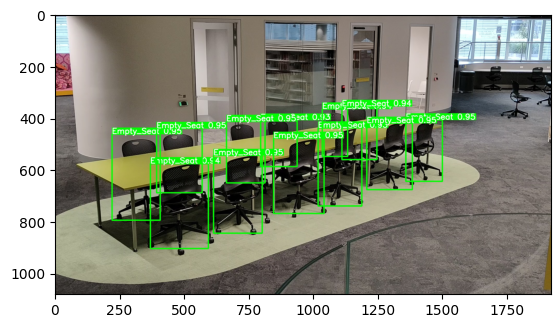

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_img = plt.imread("/content/drive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp18/empty_2001.jpg")
resize_img = cv2.resize(test_img, (20, 20))
plt.imshow(test_img)

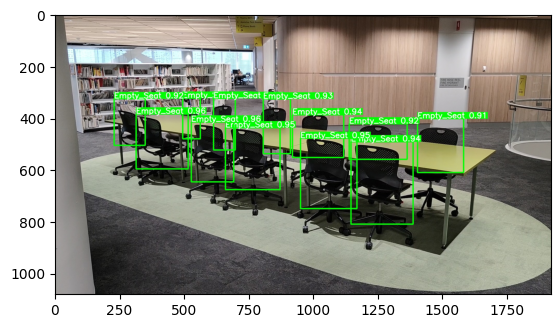

In [ ]:
test_img2 = plt.imread("/content/drive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp18/empty_5052.jpg")
resize_img = cv2.resize(test_img2, (20, 20))
plt.imshow(test_img2)

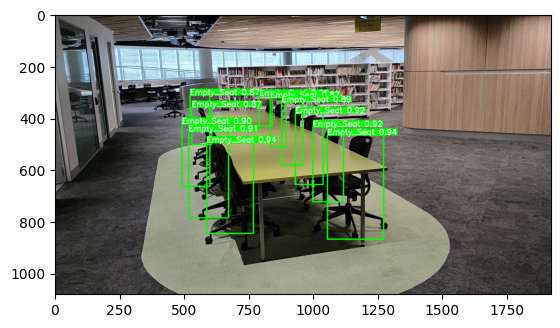

In [ ]:
test_img3 = plt.imread("/content/drive/MyDrive/42028_Assessment3/yolov5/runs/detect/exp18/frame_000359.PNG")
resize_img = cv2.resize(test_img3, (20, 20))
plt.imshow(test_img3)

# Display performance analysis

## Show Train and Validation Visualization Result

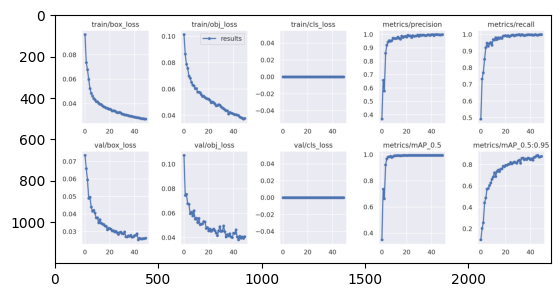

In [ ]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/results.png') # Change 'exp' to the last in the train directory
#resize_img = cv2.resize(image, (20, 20))
plt.imshow(image)

## Show Validation Reselt

In [ ]:
!python val.py --weights /content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt --data data.yaml

val: data=data.yaml, weights=['/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/drive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
new_train_yaml summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
100% 755k/755k [00:00<00:00, 17.7MB/s]
val: Scanning /content/drive/MyDrive/42028_Assessment3/dataset_empty/valid/labels.cache... 258 images, 0 backgrounds, 0 corrupt: 100% 258/258 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 9/9 [00:3

## Show Test Result
- The val.py is designed to evaluate the performance of the validation dataset by default. Therefore, to evaluate the performance of the test datasets, we need to modify the new_data_yaml file and rewrite the paths for the test datasets to point to the validation dataset path.

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 1
train_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/train" #@param {type:"string"}
val_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/test" #@param {type:"string"}
test_data_dir = "/content/drive/MyDrive/42028_Assessment3/dataset_empty/test" #@param {type:"string"}

class_names = ["Empty_Seat"] #@param {type:"raw"}
with open('data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

In [ ]:
# Change the path of the validation in new_data_yaml to the path of the test dataset and see how the result of test dataset
!python val.py --weights /content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt --data data_yaml

val: data=data_yaml, weights=['/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /content/drive/MyDrive/42028_Assessment3/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-160-g867f7f0 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
new_train_yaml summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /content/drive/MyDrive/42028_Assessment3/dataset_empty/test/labels.cache... 258 images, 1 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 9/9 [00:26<00:00,  2.91s/it]
                   a

## Confunsion Matrix - Train

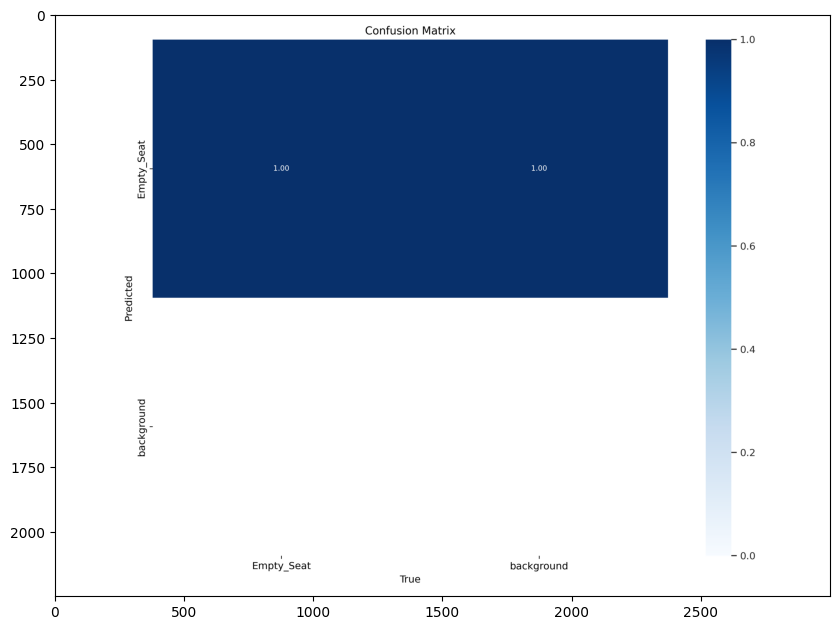

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/drive/MyDrive/42028_Assessment3/yolov5/runs/train/exp17/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

## Confusion Matrix - Validation

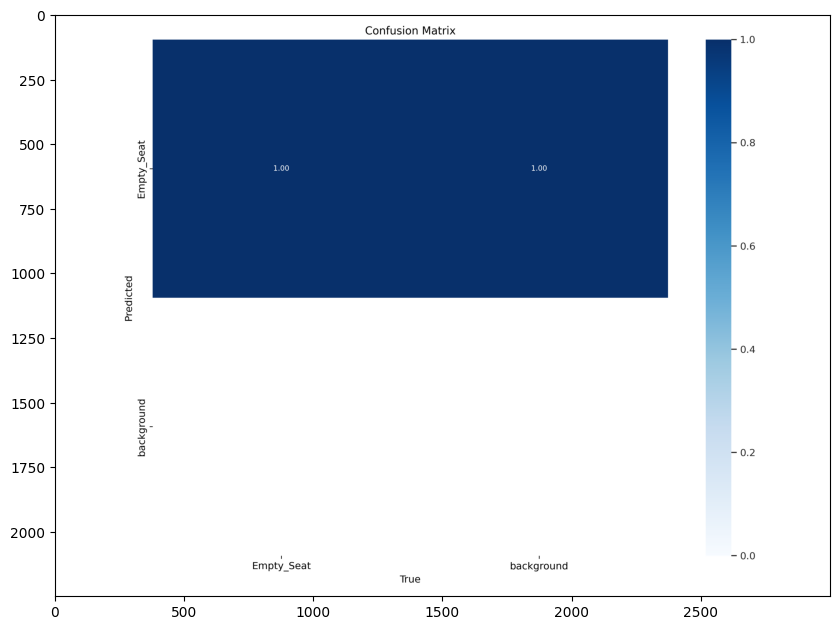

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/drive/MyDrive/42028_Assessment3/yolov5/runs/val/exp10/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()

## Confusion Matrix - Test

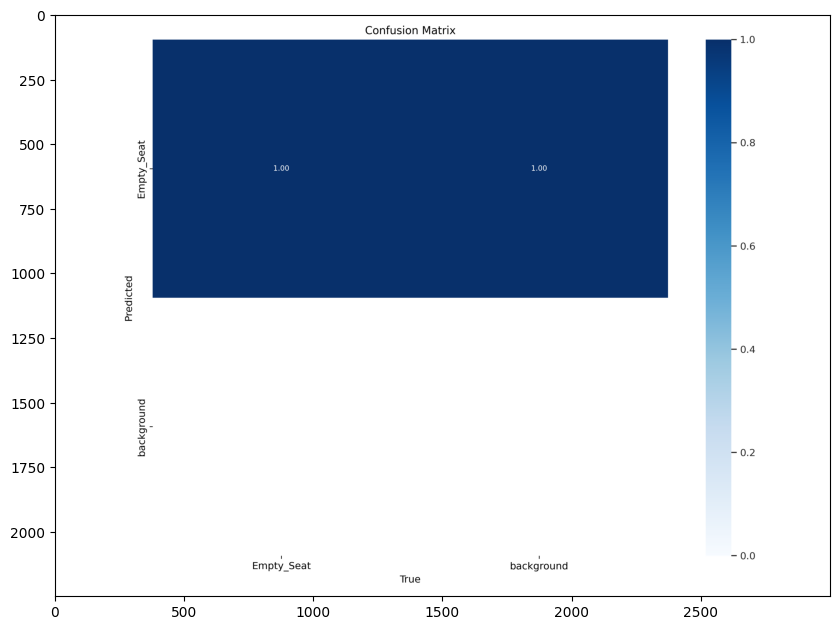

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as image

img = image.imread('/content/drive/MyDrive/42028_Assessment3/yolov5/runs/val/exp12/confusion_matrix.png')
fig = plt.figure(figsize=(10, 10), dpi=100)
plt.imshow(img)
plt.show()